In [21]:
#Import Libraries
import sys
import os
import pandas as pd
from datetime import datetime

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from scripts.data_processing import DataProcessing
from scripts.model import Model
from scripts.data_loader import DataLoader


In [22]:
# Loads a dataset from a text file and saves it as a CSV file.
dataLoader = DataLoader()
df = dataLoader.load_csv('../data/cleaned/CleanedMachineLearningRating_v3.csv')

dp = DataProcessing()
m = Model()

g:\KAIM\week3\insurance-risk-analytics-week3\scripts\data_loader.py:32: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_path)


Loaded data from ../data/cleaned/CleanedMachineLearningRating_v3.csv


In [23]:
df

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Bank,AccountType,MaritalStatus,...,TermFrequency,CalculatedPremiumPerTerm,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,TotalPremium,TotalClaims
0,145249,12827,2015-03-01,True,Not specified,Close Corporation,Mr,First National Bank,Current account,Not specified,...,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,21.929825,0.0
1,145249,12827,2015-05-01,True,Not specified,Close Corporation,Mr,First National Bank,Current account,Not specified,...,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,21.929825,0.0
2,145249,12827,2015-07-01,True,Not specified,Close Corporation,Mr,First National Bank,Current account,Not specified,...,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,0.000000,0.0
3,145255,12827,2015-05-01,True,Not specified,Close Corporation,Mr,First National Bank,Current account,Not specified,...,Monthly,584.6468,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,512.848070,0.0
4,145255,12827,2015-07-01,True,Not specified,Close Corporation,Mr,First National Bank,Current account,Not specified,...,Monthly,584.6468,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000093,31520,389,2015-04-01,False,ZW,Individual,Mr,ABSA Bank,Savings account,Single,...,Monthly,395.8481,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,347.235175,0.0
1000094,31520,389,2015-06-01,False,ZW,Individual,Mr,ABSA Bank,Savings account,Single,...,Monthly,395.8481,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,347.235175,0.0
1000095,31520,389,2015-08-01,False,ZW,Individual,Mr,ABSA Bank,Savings account,Single,...,Monthly,395.8481,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,347.235175,0.0
1000096,31519,389,2014-07-01,False,ZW,Individual,Mr,ABSA Bank,Savings account,Single,...,Monthly,2.6391,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,2.315000,0.0


In [24]:
df.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Bank',
       'AccountType', 'MaritalStatus', 'Gender', 'Province', 'PostalCode',
       'MainCrestaZone', 'SubCrestaZone', 'mmcode', 'VehicleType',
       'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity',
       'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate',
       'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice',
       'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt',
       'Converted', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'TotalPremium', 'TotalClaims'],
      dtype='object')

In [25]:
numerical_columns = ['Cylinders', 'cubiccapacity', 'kilowatts',  'NumberOfDoors',
                     'CustomValueEstimate', 'CapitalOutstanding', 'SumInsured', 'CalculatedPremiumPerTerm', 
                     'TotalPremium', 'TotalClaims']

In [37]:
categorical_columns = ['Citizenship', 'LegalType', 'Title', 'AccountType', 'MaritalStatus', 
                       'Gender', 'Province',  'VehicleType', ]

In [27]:
dates = ['TransactionMonth', 'RegistrationYear', 'VehicleIntroDate']

In [28]:
high_cardinality_cols = ['UnderwrittenCoverID', 'PolicyID', 'Bank', 'PostalCode', 'mmcode', 'make', 'Model', 
                         'MainCrestaZone', 'SubCrestaZone', 'bodytype', 'ExcessSelected',
                         'CoverCategory', 'CoverType', 'CoverGroup']

In [29]:
binary_columns = ['AlarmImmobiliser', 'TrackingDevice', 'WrittenOff', 'Rebuilt', 'Converted']

In [ ]:
cols_552 = [
    'mmcode', 'Cylinders',
    'cubiccapacity', 'kilowatts', 'NumberOfDoors', 
]

# Check if the same rows are missing
missing_together = df[cols_552].isnull().all(axis=1)
print("Number of rows with all 552-value columns missing:", missing_together.sum())

# Drop if there is any missing value
df = df.dropna(subset=cols_552)

Number of rows with all 552-value columns missing: 0


In [ ]:
df.fillna({'CustomValueEstimate': df['CustomValueEstimate'].median()}, inplace=True)


In [ ]:
# First convert all to string (to safely apply str.replace)
df['CapitalOutstanding'] = df['CapitalOutstanding'].astype(str)

# Replace comma with dot
df['CapitalOutstanding'] = df['CapitalOutstanding'].str.replace(',', '.')

# Convert to numeric, coercing errors to NaN
df['CapitalOutstanding'] = pd.to_numeric(df['CapitalOutstanding'], errors='coerce')

df.fillna({'CapitalOutstanding': df['CapitalOutstanding'].median()}, inplace=True)


In [30]:
df['IsVATRegistered'] = df['IsVATRegistered'].astype(int)

In [31]:
df['NewVehicle'] = df['NewVehicle'].map({'Less than 6 months': 1, 'More than 6 months': 0})
df['NewVehicle'] = df['NewVehicle'].fillna(0)
df['NewVehicle'] = df['NewVehicle'].astype(int)

In [32]:
for bin_col in binary_columns:
    df[bin_col] = df[bin_col].map({'Yes': 1, 'No': 0})
    df[bin_col] = df[bin_col].fillna(0)
    df[bin_col] = df[bin_col].astype(int)


In [46]:
from sklearn.preprocessing import OneHotEncoder

# Assume categorical_columns is a list of your categorical column names
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid dummy variable trap

# Fit and transform the categorical columns
encoded = encoder.fit_transform(df[categorical_columns])

# Get new column names
encoded_cols = encoder.get_feature_names_out(categorical_columns)

# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded, columns=encoded_cols)

# Concatenate with the original DataFrame (drop original categorical columns if needed)
df = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)

In [48]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['TermFrequency'] = le.fit_transform(df['TermFrequency'].astype(str))

In [49]:
df

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Bank,PostalCode,MainCrestaZone,SubCrestaZone,mmcode,RegistrationYear,...,Province_Limpopo,Province_Mpumalanga,Province_North West,Province_Northern Cape,Province_Western Cape,VehicleType_Heavy Commercial,VehicleType_Light Commercial,VehicleType_Medium Commercial,VehicleType_Passenger Vehicle,VehicleType_nan
0,145249,12827,2015-03-01,1,First National Bank,1459,Rand East,Rand East,44069150.0,2004-01-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,145249,12827,2015-05-01,1,First National Bank,1459,Rand East,Rand East,44069150.0,2004-01-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,145249,12827,2015-07-01,1,First National Bank,1459,Rand East,Rand East,44069150.0,2004-01-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,145255,12827,2015-05-01,1,First National Bank,1459,Rand East,Rand East,44069150.0,2004-01-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,145255,12827,2015-07-01,1,First National Bank,1459,Rand East,Rand East,44069150.0,2004-01-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000093,31520,389,2015-04-01,0,ABSA Bank,7493,Karoo 1 (Northeast of Cape Town),Northeast of CT,4614100.0,2013-01-01,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1000094,31520,389,2015-06-01,0,ABSA Bank,7493,Karoo 1 (Northeast of Cape Town),Northeast of CT,4614100.0,2013-01-01,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1000095,31520,389,2015-08-01,0,ABSA Bank,7493,Karoo 1 (Northeast of Cape Town),Northeast of CT,4614100.0,2013-01-01,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1000096,31519,389,2014-07-01,0,ABSA Bank,7493,Karoo 1 (Northeast of Cape Town),Northeast of CT,4614100.0,2013-01-01,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df.isnull().sum()

In [50]:
# Train-Test Split
# Define features (X) and target variables (y)
# Ensure all non-numeric columns after encoding are dropped or handled
import numpy as np
from sklearn.model_selection import train_test_split

X = df.drop(columns=['TotalPremium', 'TotalClaims'], errors='ignore') # Drop target variables and the helper 'HasClaim'
y_premium = df['TotalPremium']
y_claims = df['TotalClaims']

# Drop any remaining non-numeric columns that weren't encoded
X = X.select_dtypes(include=np.number)


X_train, X_test, y_premium_train, y_premium_test, y_claims_train, y_claims_test = train_test_split(
    X, y_premium, y_claims, test_size=0.3, random_state=42) # 70:30 split

print("\nData Preprocessing Complete.")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_premium_train:", y_premium_train.shape)
print("Shape of y_premium_test:", y_premium_test.shape)
print("Shape of y_claims_train:", y_claims_train.shape)
print("Shape of y_claims_test:", y_claims_test.shape)


Data Preprocessing Complete.
Shape of X_train: (700068, 51)
Shape of X_test: (300030, 51)
Shape of y_premium_train: (700068,)
Shape of y_premium_test: (300030,)
Shape of y_claims_train: (700068,)
Shape of y_claims_test: (300030,)


Linear Regression - RMSE: 31804.32, R2: 0.290
Random Forest - RMSE: 33634.25, R2: 0.206
XGBoost - RMSE: 36431.30, R2: 0.068


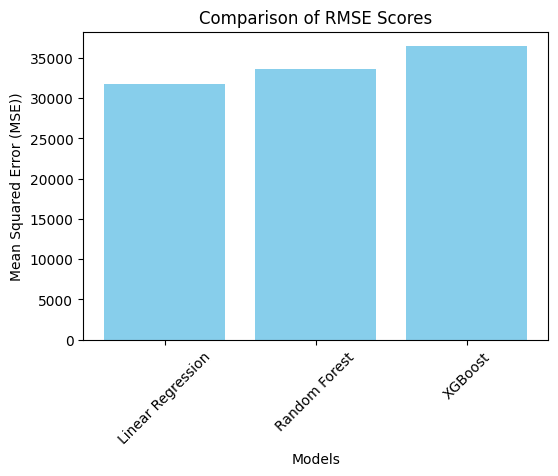

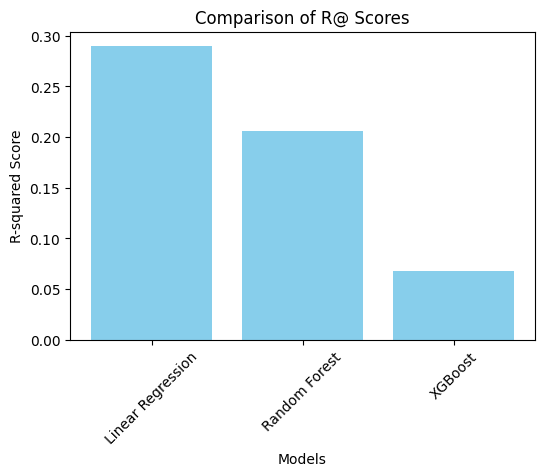

In [85]:
# --- Claim Severity Prediction (Risk Model) ---
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df['TransactionDate'] = pd.to_datetime(df['TransactionMonth'])
df['TransactionYear'] = df['TransactionDate'].dt.year
df['TransactionMonth'] = df['TransactionDate'].dt.month
# Then drop the original date column
df = df.drop(columns=['TransactionDate'])

# Subset data: only policies with claims > 0
claim_df = df[df['TotalClaims'] > 0].copy()

# Features (drop target and any leakage columns)
features = [col for col in claim_df.columns if col not in ['TotalClaims', 'CalculatedPremiumPerTerm']]
X = claim_df[features]
X = X.select_dtypes(exclude=['object'])
y = claim_df['TotalClaims']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# XGBoost
xgb = XGBRegressor(random_state=42, verbosity=0)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

models = ['Linear Regression', 'Random Forest', 'XGBoost']
rmse_scores, r2_scores = [], []

# Evaluation
for name, y_pred in zip(['Linear Regression', 'Random Forest', 'XGBoost'], [y_pred_lr, y_pred_rf, y_pred_xgb]):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - RMSE: {rmse:.2f}, R2: {r2:.3f}")
    rmse_scores.append(rmse)
    r2_scores.append(r2)

plt.figure(figsize=(6, 4))
plt.bar(models, rmse_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE))')
plt.title('Comparison of RMSE Scores')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6, 4))
plt.bar(models, r2_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.title('Comparison of R@ Scores')
plt.xticks(rotation=45)
plt.show()


